### Spectral mismatch calculation example using horizontal spectral irradiance, module spectral response measurements and pvlib-python functions.

Notebook author: Anton Driesse <anton.driesse@pvperformancelabs.com>


Last modified: 2022-12-20


In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt

# some preferences you may want to change
matplotlib.style.use('classic')
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rcParams['axes.grid'] = True

# %matplotlib inline


In [2]:
# make sure the data file locations are correctly identified

SR_LIBRARY = 'data/sr_library.nc'
SPECTRA_FILE = 'data/spectra.nc'
WEATHER_FILE = 'data/weather.nc'


In [3]:
# let's see what's inside the spectral response library first

srlib = xr.open_dataset(SR_LIBRARY)
print(srlib)


<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/14)
    title:        Spectral responses of 12 commercial silicon modules
    comment:      Spectral responses are measured at multiple sites on each m...
    project:      Spectral Irradiance Data and Resources
    version:      1.0
    date:         2022-12-20
    history:      2022-12-20: Data published in netcdf format
    ...           ...
    institution:  Anton Driesse: PV Performance Labs Germany, Marios Theristi...
    contact:      Anton Driesse <anton.driesse@pvperformancelabs.com>
    source:       Laboratory measurements
    urls:         ['https://pvpmc.sandia.gov/', 'https://datahub.duramat.org/...
    readme:       This netcdf file contains multiple spectral response data s...
    keys:         ['Solaria_400_mono', 'LG_400_mono', 'Canadian_275_mono', 'J...


In [4]:
# perhaps the readme attribute contains some useful information?

print(srlib.attrs['readme'])


This netcdf file contains multiple spectral response data sets. Their names are listed in the 'keys' attribute for reference. 


In [5]:
# here are all 12 module keys

print(srlib.attrs['keys'])


['Solaria_400_mono', 'LG_400_mono', 'Canadian_275_mono', 'Jinko_260_poly', 'Panasonic_325_hit', 'Mission_300_mono', 'LG_320_mono', 'Canadian_270_poly', 'Qcells_280_poly', 'Itek_360_mono', 'Qcells_300_mono', 'Trina_260_poly']


In [6]:
# read in a sample module

hit_data = xr.open_dataset(SR_LIBRARY, group='Panasonic_325_hit')
print(hit_data)


<xarray.Dataset>
Dimensions:     (wavelength: 181, site: 384)
Coordinates:
  * wavelength  (wavelength) int64 300 305 310 315 320 ... 1185 1190 1195 1200
  * site        (site) int64 1 2 3 4 5 6 7 8 ... 377 378 379 380 381 382 383 384
Data variables:
    sr          (wavelength) float32 ...
    sr_stdev    (wavelength) float32 ...
    qe          (site, wavelength) float32 ...
Attributes:
    company:      Panasonic
    series:       HIT
    model:        VBHN325SA 16
    pmax:         325.0
    technology:   mono-Si
    technology2:  HIT
    n_cells:      384


{'units': 'nm', 'long_name': 'Wavelength', 'standard_name': 'wavelength'}


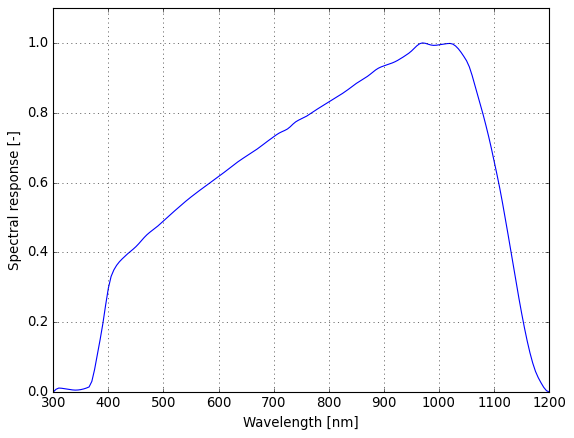

In [7]:
# even variables have attributes, which are used when plotting using xarray

print(hit_data.wavelength.attrs)
hit_data.sr.plot()
plt.ylim(0, 1.1);


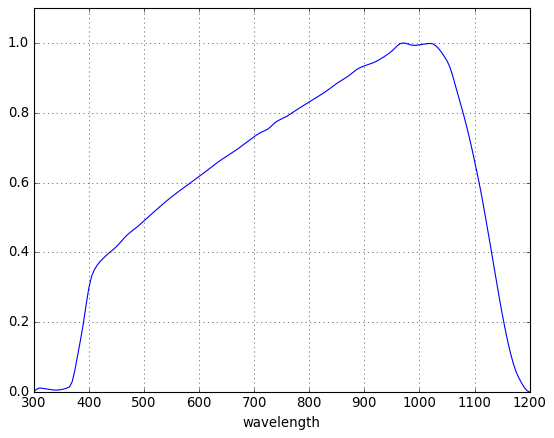

In [8]:
# for pvlib it is more convenient to convert the data to a pandas DataFrames

hit_sr = hit_data.sr.to_pandas()
hit_sr.plot()
plt.ylim(0, 1.1);


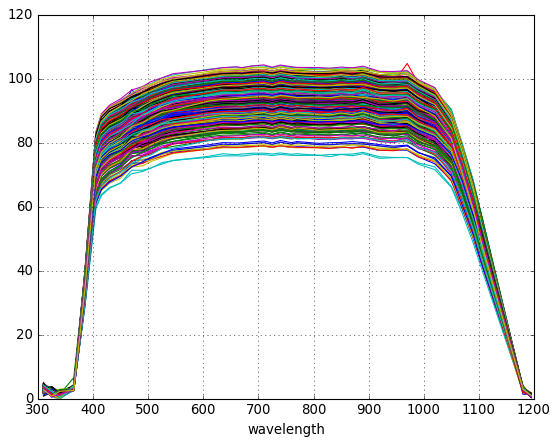

In [9]:
# the raw qe data are available as well

hit_qe = hit_data.qe.to_pandas().transpose().dropna()
hit_qe.plot(legend=False);


In [10]:
# now read in the spectra and weather data, and convert to a pandas DataFrames

with xr.open_dataset(SPECTRA_FILE) as spectra_ds:
    spectra_ds.load()
    
print(spectra_ds)

spectra = spectra_ds.ghi.to_pandas()


<xarray.Dataset>
Dimensions:     (time: 26727, wavelength: 271)
Coordinates:
  * time        (time) datetime64[ns] 2021-01-01T07:10:00 ... 2021-12-15T17:0...
  * wavelength  (wavelength) float32 350.0 355.0 360.0 ... 1.695e+03 1.7e+03
Data variables:
    ghi         (time, wavelength) float32 0.002969 0.003048 ... 0.0003072
Attributes: (12/20)
    title:        Measured global horizontal spectra
    comment:      Global horizontal spectral irradiance reported at 5 nm inte...
    project:      Spectral Irradiance Data and Resources
    version:      1.0
    date:         2022-12-20
    history:      2022-12-20: Data published in netcdf format
    ...           ...
    longitude:    -106.5401
    altitude:     1660
    city:         Albuquerque
    state:        New Mexico
    country:      USA
    timezone:     MST


In [11]:
with xr.open_dataset(WEATHER_FILE) as weather_ds:
    weather_ds.load()
    
print(weather_ds)


<xarray.Dataset>
Dimensions:          (time: 26727)
Coordinates:
  * time             (time) datetime64[ns] 2021-01-01T07:10:00 ... 2021-12-15...
Data variables: (12/13)
    source_year      (time) int32 2020 2020 2020 2020 ... 2019 2019 2019 2019
    ghi              (time) float32 -1.478 1.365 4.164 ... 6.631 1.054 -1.365
    dhi              (time) float32 -3.169 -0.5166 1.673 ... 2.663 -1.251 -3.25
    gni              (time) float32 2.411 4.312 6.542 ... 135.1 10.72 5.862
    dni              (time) float32 0.02702 0.1128 0.07311 ... 0.9504 0.3862
    dni_range        (time) float32 0.3671 0.2622 0.3004 ... 10.21 0.3369 0.3369
    ...               ...
    humidity         (time) float32 58.0 58.77 60.07 60.22 ... 22.0 22.64 22.69
    windspeed        (time) float32 2.318 1.919 2.958 ... 6.196 5.316 6.675
    pressure         (time) float32 8.319e+04 8.318e+04 ... 8.245e+04 8.247e+04
    azimuth          (time) float32 117.3 118.0 118.7 ... 241.0 241.7 242.4
    zenith           (

In [12]:
weather = weather_ds.to_pandas()

print(weather)


                     source_year        ghi       dhi         gni         dni  \
time                                                                            
2021-01-01 07:10:00         2020  -1.478058 -3.168945    2.411316    0.027019   
2021-01-01 07:15:00         2020   1.365448 -0.516617    4.311646    0.112844   
2021-01-01 07:20:00         2020   4.164429  1.672516    6.542236    0.073111   
2021-01-01 07:25:00         2020   6.505249  5.360962    9.068604    0.023841   
2021-01-01 07:30:00         2020   9.296387  7.672729   11.730713    0.139862   
...                          ...        ...       ...         ...         ...   
2021-12-15 16:40:00         2019  22.452637  8.965820  332.914062  301.984375   
2021-12-15 16:45:00         2019  13.975586  5.714355  252.363281  228.175781   
2021-12-15 16:50:00         2019   6.631470  2.662537  135.140625   62.867188   
2021-12-15 16:55:00         2019   1.053894 -1.251129   10.719482    0.950439   
2021-12-15 17:00:00         

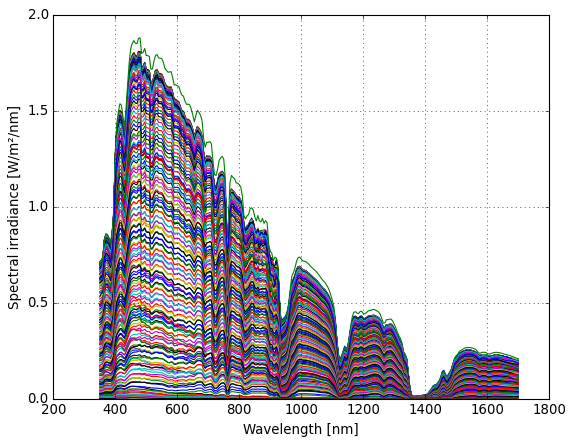

In [13]:
# plot some spectra

nice_day = '2021-06-01'

plt.figure()
plt.plot(spectra.loc[nice_day].T)
plt.ylim(0)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Spectral irradiance [W/m²/nm]');


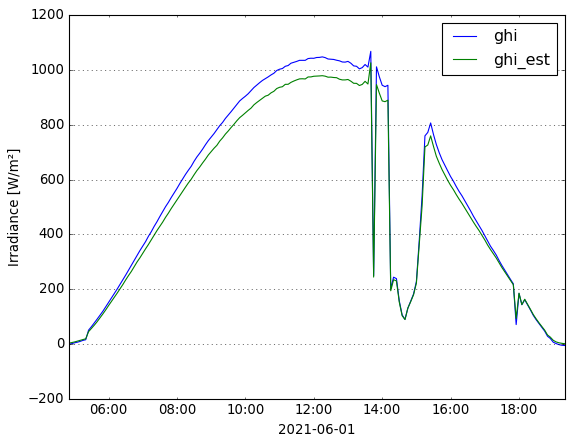

In [14]:
# integrate the spectra to estimate the total ghi 350-1700 nm
# this is a bit less than the full broadband ghi

wavelengths = spectra.columns.values
ghi_est = np.trapz(spectra, x=wavelengths, axis=1)
ghi_est = pd.Series(ghi_est, index=spectra.index, name='ghi_est')

plt.figure()
weather.ghi[nice_day].plot()
ghi_est[nice_day].plot()
plt.ylabel('Irradiance [W/m²]')
plt.xlabel(nice_day)
plt.legend();


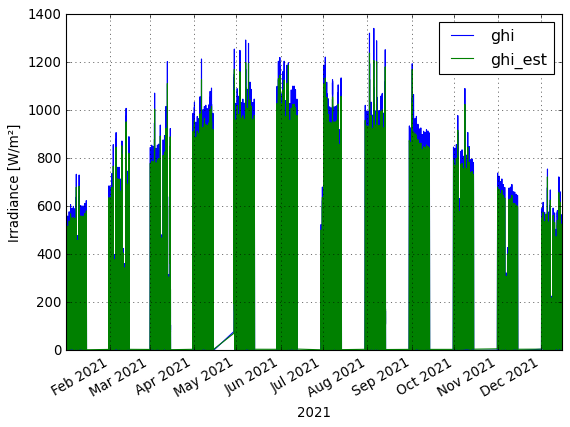

In [15]:
# now plot the whole year to visualize the dates for which data are available

plt.figure()
weather.ghi.plot()
ghi_est.plot()
plt.ylim(0)
plt.ylabel('Irradiance [W/m²]')
plt.xlabel('2021')
plt.legend();


In [16]:
# finally calculate spectral mismatch from the field measurements

from pvlib.spectrum import calc_spectral_mismatch_field

weather['smm'] = calc_spectral_mismatch_field(hit_sr, spectra)


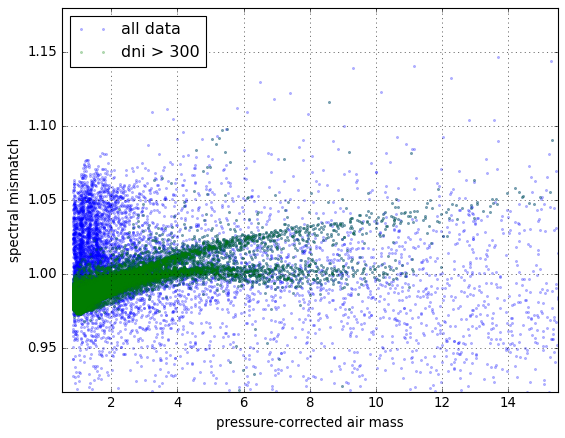

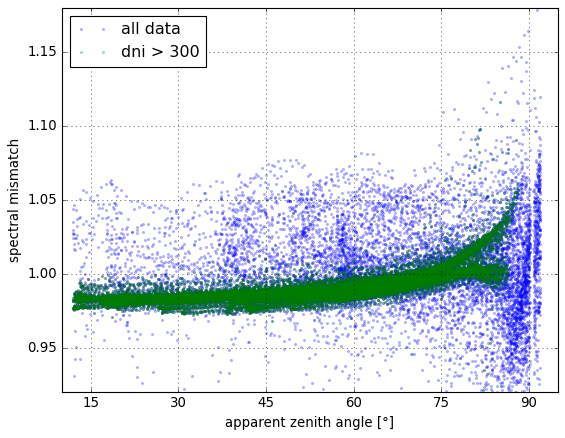

In [17]:
# plot mismatch against air mass and zenith angle

from pvlib.atmosphere import get_relative_airmass, get_absolute_airmass

weather['am_abs'] = get_absolute_airmass(get_relative_airmass(weather.apparent_zenith),
                                         weather.pressure)

# identify some mostly clear times
clear = 'dni > 300'

plt.figure()
plt.plot('am_abs', 'smm', '.', data=weather, alpha=.3, ms=4, label='all data')
plt.plot('am_abs', 'smm', '.', data=weather.query(clear), alpha=.3, ms=4, label=clear)
plt.xlim(0.5, 15.5)
plt.ylim(0.92, 1.18)
plt.xlabel('pressure-corrected air mass')
plt.ylabel('spectral mismatch')
plt.legend(loc='best')

plt.figure()
plt.plot('apparent_zenith', 'smm', '.', data=weather, alpha=.3, ms=4, label='all data')
plt.plot('apparent_zenith', 'smm', '.', data=weather.query(clear), alpha=.3, ms=4, label=clear)
plt.xticks([15, 30, 45, 60, 75, 90])
plt.xlim(10, 95)
plt.ylim(0.92, 1.18)
plt.xlabel('apparent zenith angle [°]')
plt.ylabel('spectral mismatch')
plt.legend(loc='best');


### The end

<font size=1>Sandia National Laboratories is a multi-mission laboratory managed and operated
by National Technology & Engineering Solutions of Sandia, LLC, a wholly owned
subsidiary of Honeywell International Inc., for the U.S. Department of Energy’s
National Nuclear Security Administration under contract DE-NA0003525.</font>